In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from itertools import combinations
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [67]:
df = pd.read_csv('grad.csv')

In [68]:
y = df.admit
X = df[['gpa','gre','rank']]
df.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [69]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [70]:
df_ct = pd.crosstab(index=[df['admit']], columns=[df['rank']], margins=True) 

In [71]:
df_ct

rank,1,2,3,4,All
admit,,,,,
0,28,97,93,55,273
1,33,54,28,12,127
All,61,151,121,67,400


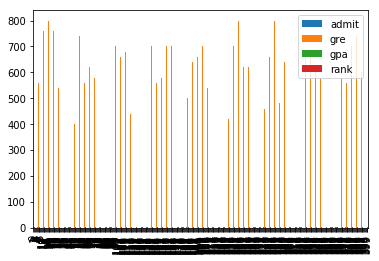

In [72]:
df.plot(kind="bar")


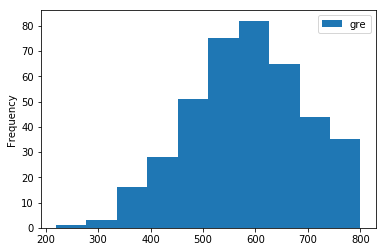

In [73]:
df.plot( x='gpa', y='gre', kind='hist')

In [80]:
rows = []
for i in range(1,11):
    combos = list(combinations(['gre', 'gpa', 'rank'],i))
    for j,com in enumerate(combos):
        y = df.admit
        X = pd.DataFrame(df, columns=com)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        model = LogisticRegression().fit(X_train, y_train)
        score = model.score(X_test, y_test)
        s = ', '.join(com)
        rows.append({'Score':score, 'Columns':s, 'Coef':model.coef_,'Int':model.intercept_})
        df1 = pd.DataFrame(rows)
df1.head()

,Coef,Columns,Int,Score
0,[[0.00139291052464]],gre,[-1.54917610063],0.681818
1,[[0.319303457297]],gpa,[-1.81404627438],0.681818
2,[[-0.504582785938]],rank,[0.429516683081],0.681818
3,"[[0.00124646717199, 0.12683616908]]","gre, gpa",[-1.891342199],0.681818
4,"[[0.00178403124724, -0.53347199398]]","gre, rank",[-0.536909864111],0.734848
